In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [8]:
books = ["LBH","EBH"]

df = pd.read_csv("MC_Probabilities_"+books[0]+".csv", sep=";")
for i in range(1,len(books)):
    dfbook = pd.read_csv("MC_Probabilities_"+books[i]+".csv", sep=";")
    df = pd.merge(df,dfbook, on='Function', how="outer")
df = df.fillna(0)
df = df.set_index("Function")
df.columns = books
df

,LBH,EBH
Function,,
CLAUSE-END,0.239572,0.240568
Adju,0.032620,0.016255
Cmpl,0.111765,0.090522
Conj,0.154011,0.185531
Frnt,0.000535,0.001190
Loca,0.005882,0.011447
ModS,0.000535,0.000183
Modi,0.004813,0.006685
NCop,0.002674,0.000595


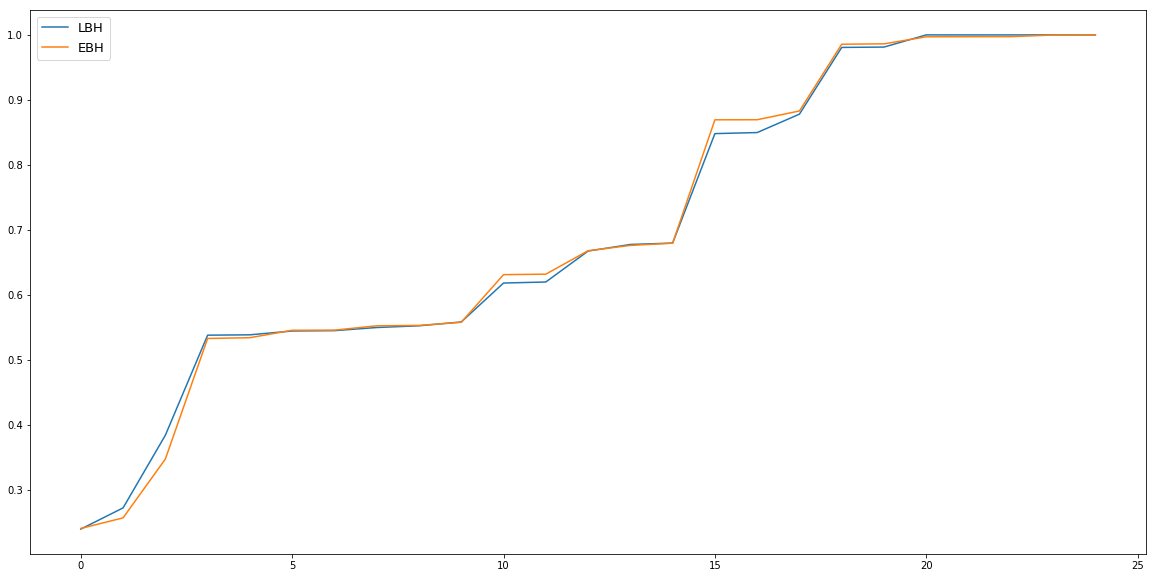

In [9]:
plt.figure(figsize= (20,10))
for column in df:
    dfCol = df[column]
    #dfCol = dfCol.sort_values(ascending=False)
    dfCol = dfCol.cumsum(0)
    plt.plot(dfCol.values, label = column)
plt.legend(loc='upper left',  prop={'size': 13})
plt.show()

In [10]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(df.values)
p



1.0

In [11]:
import sklearn.metrics

booksAmount = len(df.columns.values)
matrix = np.zeros((booksAmount,booksAmount))

for indexi,i in enumerate(df):
    for indexj,j in enumerate(df):
        if i != j and indexi>indexj:
            array1 = np.array(df[i].values).transpose()
            array2 = np.array(df[j].values).transpose()
            a = sklearn.metrics.normalized_mutual_info_score(array2,array1)
            matrix[indexi][indexj] = a

dfScore = pd.DataFrame(matrix, columns = list(df.columns.values))
dfScore["Function"] = df.columns.values
dfScore = dfScore.set_index("Function")
dfScore = np.round(dfScore, 3)
dfScore


,LBH,EBH
Function,,
LBH,0.000,0.0
EBH,0.908,0.0
